In [ ]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 21kB/s 
     |████████████████████████████████| 4.3MB 33.2MB/s 
     |████████████████████████████████| 501kB 60.3MB/s 


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

Cloning into 'Movies-Poster_Dataset'...
remote: Enumerating objects: 7873, done.
remote: Counting objects: 100% (7873/7873), done.
remote: Compressing objects: 100% (7873/7873), done.
remote: Total 7873 (delta 1), reused 7872 (delta 0), pack-reused 0
Receiving objects: 100% (7873/7873), 246.59 MiB | 61.23 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Checking out files: 100% (7871/7871), done.


In [ ]:
data = pd.read_csv('/content/Movies-Poster_Dataset/train.csv')
data.shape

(7254, 27)

In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
img_width= 350
img_height= 350

X=[]

for i in tqdm(range(data.shape[0])):
  path='/content/Movies-Poster_Dataset/Images/' + data['Id'][i] + '.jpg'
  img= image.load_img(path, target_size=(img_width,img_height,3))
  img= image.img_to_array(img) 
  img/=255.0
  X.append(img)

X=np.array(X)

100%|██████████| 7254/7254 [00:29<00:00, 249.31it/s]


In the above cell, all the images are stored in an X array.

In [ ]:
X.shape


(7254, 350, 350, 3)

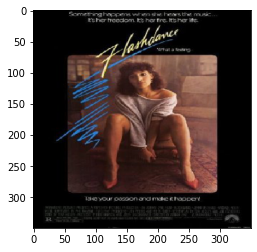

In [ ]:
plt.imshow(X[1])

In [ ]:
data['Genre'][1]

"['Drama', 'Romance', 'Music']"

In [ ]:
y = data.drop(['Id', 'Genre'],axis=1)
y= y.to_numpy()
y.shape

(7254, 25)

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X,y,random_state=0, test_size= 0.15)

###Build CNN

In [ ]:
model= Sequential()
model.add(Conv2D(16,(3,3), activation='relu', input_shape= X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))


model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history= model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Train on 6165 samples, validate on 1089 samples
Epoch 1/5
6165/6165 [==============================] - 194s 32ms/sample - loss: 0.6491 - accuracy: 0.6757 - val_loss: 0.3412 - val_accuracy: 0.9088
Epoch 2/5
6165/6165 [==============================] - 192s 31ms/sample - loss: 0.2960 - accuracy: 0.8974 - val_loss: 0.2470 - val_accuracy: 0.9093
Epoch 3/5
6165/6165 [==============================] - 187s 30ms/sample - loss: 0.2600 - accuracy: 0.9074 - val_loss: 0.2434 - val_accuracy: 0.9102
Epoch 4/5
6165/6165 [==============================] - 188s 31ms/sample - loss: 0.2511 - accuracy: 0.9107 - val_loss: 0.2412 - val_accuracy: 0.9119
Epoch 5/5
6165/6165 [==============================] - 188s 30ms/sample - loss: 0.2442 - accuracy: 0.9116 - val_loss: 0.2389 - val_accuracy: 0.9113


In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

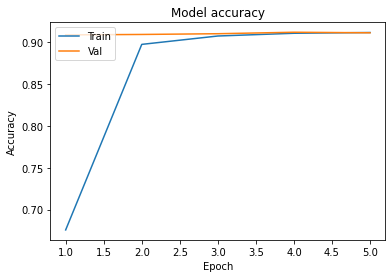

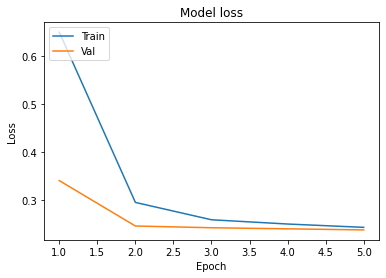

In [ ]:
plot_learningCurve(history,5)

## TESTING PART


Drama
Comedy
Action


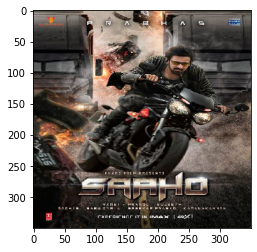

In [ ]:

img= image.load_img('/content/Movies-Poster_Dataset/saaho.jpg', target_size=(img_width,img_height,3))
plt.imshow(img)
img= image.img_to_array(img)
img/=255.0

img=img.reshape(1, img_width, img_height,3)

classes= data.columns[2:]

y_prob= model.predict(img)

top3= np.argsort(y_prob[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [ ]:
y_prob

array([[0.15604365, 0.14896089, 0.04714796, 0.04269221, 0.50533825,
        0.13502833, 0.07588619, 0.45706323, 0.10743013, 0.06431505,
        0.01994082, 0.02711156, 0.03501859, 0.01063126, 0.04036087,
        0.0030334 , 0.00347248, 0.00277856, 0.1805368 , 0.03302589,
        0.00359151, 0.0276612 , 0.07673272, 0.01301807, 0.00554904]],
      dtype=float32)